In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('Heart_Disease_data.csv')
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
x = data.iloc[:,0:13]
y = data.iloc[:,-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=True)

In [16]:
#regressor = LogisticRegression()
regressor = RandomForestClassifier(n_estimators =100,criterion="gini")
regressor.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
y_pred=regressor.predict(x_test)

In [18]:
accuracy_score(y_pred,y_test)

0.9032258064516129

In [19]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[13,  3],
       [ 0, 15]], dtype=int64)

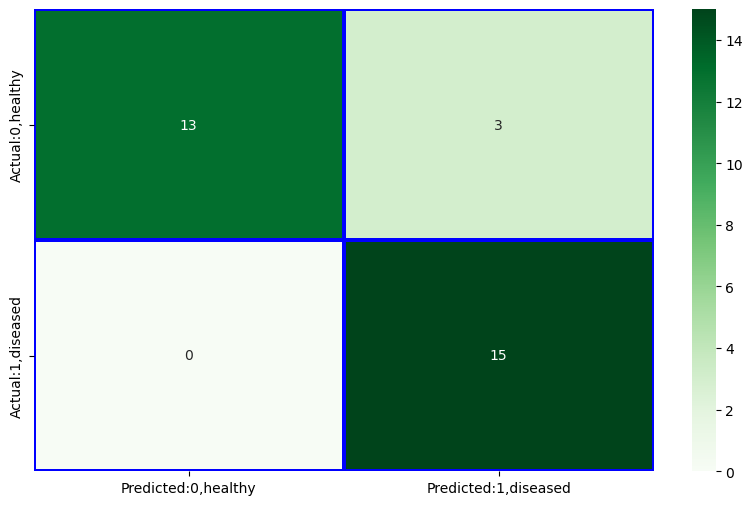

In [20]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0,healthy', 'Predicted:1,diseased'],  
                           index =['Actual:0,healthy', 'Actual:1,diseased']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

In [10]:
f1 = f1_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)
recall = recall_score(y_pred,y_test)
print('F1 score is' ,f1)
print("Precision is",precision)
print("Recall is",recall)


F1 score is 0.8749999999999999
Precision is 0.9333333333333333
Recall is 0.8235294117647058


In [11]:
input_Data = (56,1,1,120,236,0,1,178,0,0.8,2,0,2)
input_Data = np.asarray(input_Data)

input_Data = input_Data.reshape(1,-1)
prediction = regressor.predict(input_Data)
prediction

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)